## **Implementation and Analysis of K-Means Algorithm**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


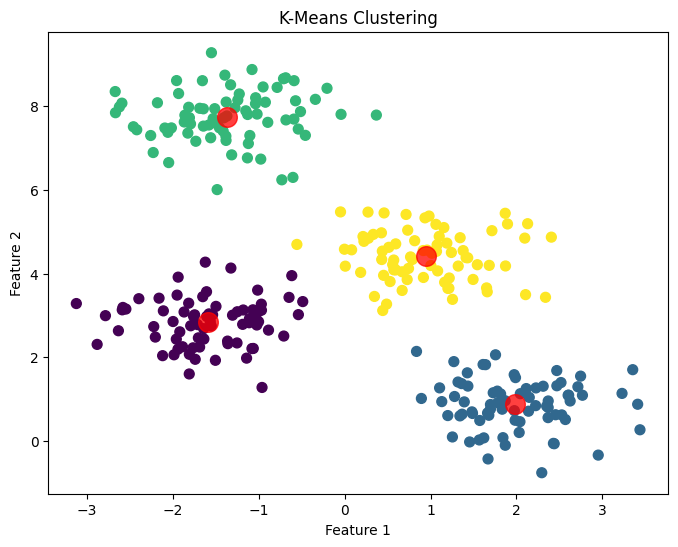

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clusters and centroids
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## **Implementation and Analysis of K-Medoid Algorithm**

Initial centers are  [70, 71, 18]
Change centers to  [70, 71, 1]
Change centers to  [70, 71, 2]
Change centers to  [70, 7, 2]
Change centers to  [70, 23, 2]
Change centers to  [70, 27, 2]
Change centers to  [28, 27, 2]
Change centers to  [50, 27, 2]
Change centers to  [50, 27, 55]
Change centers to  [56, 27, 55]
Change centers to  [80, 27, 55]
Change centers to  [94, 27, 55]
Change centers to  [94, 98, 55]
Change centers to  [94, 98, 11]
End Searching by no swaps


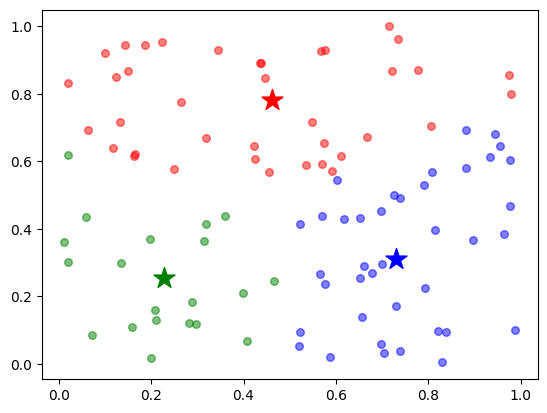

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
import time

def _get_init_centers(n_clusters, n_samples):
    '''return random points as initial centers'''
    init_ids = []
    while len(init_ids) < n_clusters:
        _ = np.random.randint(0,n_samples)
        if not _ in init_ids:
            init_ids.append(_)
    return init_ids

def _get_distance(data1, data2):
    '''example distance function'''
    return np.sqrt(np.sum((data1 - data2)**2))

def _get_cost(X, centers_id, dist_func):
    '''return total cost and cost of each cluster'''
    st = time.time()
    dist_mat = np.zeros((len(X),len(centers_id)))
    # compute distance matrix
    for j in range(len(centers_id)):
        center = X[centers_id[j],:]
        for i in range(len(X)):
            if i == centers_id[j]:
                dist_mat[i,j] = 0.
            else:
                dist_mat[i,j] = dist_func(X[i,:], center)
    #print 'cost ', -st+time.time()
    mask = np.argmin(dist_mat,axis=1)
    members = np.zeros(len(X))
    costs = np.zeros(len(centers_id))
    for i in range(len(centers_id)):
        mem_id = np.where(mask==i)
        members[mem_id] = i
        costs[i] = np.sum(dist_mat[mem_id,i])
    return members, costs, np.sum(costs), dist_mat

def _kmedoids_run(X, n_clusters, dist_func, max_iter=1000, tol=0.001, verbose=True):
    '''run algorithm return centers, members, and etc.'''
    # Get initial centers
    n_samples, n_features = X.shape
    init_ids = _get_init_centers(n_clusters,n_samples)
    if verbose:
        print('Initial centers are ', init_ids)
    centers = init_ids
    members, costs, tot_cost, dist_mat = _get_cost(X, init_ids,dist_func)
    cc,SWAPED = 0, True
    while True:
        SWAPED = False
        for i in range(n_samples):
            if not i in centers:
                for j in range(len(centers)):
                    centers_ = deepcopy(centers)
                    centers_[j] = i
                    members_, costs_, tot_cost_, dist_mat_ = _get_cost(X, centers_,dist_func)
                    if tot_cost_-tot_cost < tol:
                        members, costs, tot_cost, dist_mat = members_, costs_, tot_cost_, dist_mat_
                        centers = centers_
                        SWAPED = True
                        if verbose:
                            print('Change centers to ', centers)
        if cc > max_iter:
            if verbose:
                print('End Searching by reaching maximum iteration', max_iter)
            break
        if not SWAPED:
            if verbose:
                print('End Searching by no swaps')
            break
        cc += 1
    return centers,members, costs, tot_cost, dist_mat

class KMedoids(object):
    '''
    Main API of KMedoids Clustering

    Parameters
    --------
        n_clusters: number of clusters
        dist_func : distance function
        max_iter: maximum number of iterations
        tol: tolerance

    Attributes
    --------
        labels_    :  cluster labels for each data item
        centers_   :  cluster centers id
        costs_     :  array of costs for each cluster
        n_iter_    :  number of iterations for the best trail

    Methods
    -------
        fit(X): fit the model
            - X: 2-D numpy array, size = (n_sample, n_features)

        predict(X): predict cluster id given a test dataset.
    '''
    def __init__(self, n_clusters, dist_func=_get_distance, max_iter=10000, tol=0.0001):
        self.n_clusters = n_clusters
        self.dist_func = dist_func
        self.max_iter = max_iter
        self.tol = tol

    def fit(self, X,plotit=True, verbose=True):
        centers,members, costs,tot_cost, dist_mat = _kmedoids_run(
                X,self.n_clusters, self.dist_func, max_iter=self.max_iter, tol=self.tol,verbose=verbose)
        if plotit:
            fig, ax = plt.subplots(1,1)
            colors = ['b','g','r','c','m','y','k']
            if self.n_clusters > len(colors):
                raise ValueError('we need more colors')

            for i in range(len(centers)):
                X_c = X[members==i,:]
                ax.scatter(X_c[:,0],X_c[:,1],c=colors[i],alpha=0.5,s=30)
                ax.scatter(X[centers[i],0],X[centers[i],1],c=colors[i],alpha=1., s=250,marker='*')
        return

    def predict(self,X):
        raise NotImplementedError()

# Example usage
# Generate random data
np.random.seed(0)
X = np.random.rand(100, 2)

# Initialize and fit KMedoids model
kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(X)
